In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'

In [2]:
nowcast_tracer_path = "/results/SalishSea/nowcast-green/18apr16/SalishSea_1h_20160418_20160418_ptrc_T.nc"
rerun_tracer_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr18_full_run_round_2/SalishSea_1h_20160418_20160418_ptrc_T.nc"

n_grid_t = xr.open_dataset(nowcast_tracer_path)
r_grid_t = xr.open_dataset(rerun_tracer_path)

In [3]:
n_grid_t

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 24, x: 398, y: 898)
Coordinates:
  * deptht                (deptht) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 46.8597 46.8615 46.8634 46.8653 ...
    nav_lon               (y, x) float32 -123.429 -123.424 -123.419 -123.413 ...
    time_centered         (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * nvertex               (nvertex) int64 0 1 2 3
  * x                     (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * y                     (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    DOC                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MICZ                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MYRI                  (time_co

In [50]:
def plot_time_dif(var_name, array_1, array_2):

    dif_array = (array_1[var_name] - array_2[var_name])

    max_index = np.unravel_index(dif_array.values.argmax(), dif_array.values.shape)

    x_slice = max_index[3]
    y_slice = max_index[2]
    deptht = max_index[1]
    time_counter = slice(0,24)

    fig, ax = plt.subplots(1,2, figsize = (15,8))

    (dif_array.isel(depthv = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[0])
    (array_1[var_name].isel(depthv = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[1])

    
def plot_space_dif(var_name, array_1, array_2, grid_width = 10):

    dif_array = (array_1[var_name] - array_2[var_name])

    max_index = np.unravel_index(dif_array.values.argmax(), dif_array.values.shape)

    
    
    x_slice = slice(max(0,max_index[3] - int(grid_width/2)),min(array_1.coords.dims['x'], max_index[3] + int(grid_width/2))) #max_index[3] + 0 
    y_slice = slice(max(0,max_index[2] - int(grid_width/2)), min(array_1.coords.dims['y'],max_index[2] + int(grid_width/2))) # max_index[2] + 0
    deptht = max_index[1]
    time_counter = max_index[0] 
    
    fig, ax = plt.subplots(1,2, figsize = (15,8))

    (dif_array.isel(depthv = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[0])
    (array_1[var_name].isel(depthv = deptht, time_counter = time_counter, x = x_slice, y = y_slice)).plot(ax = ax[1])

1.75169181824
1.75169181824


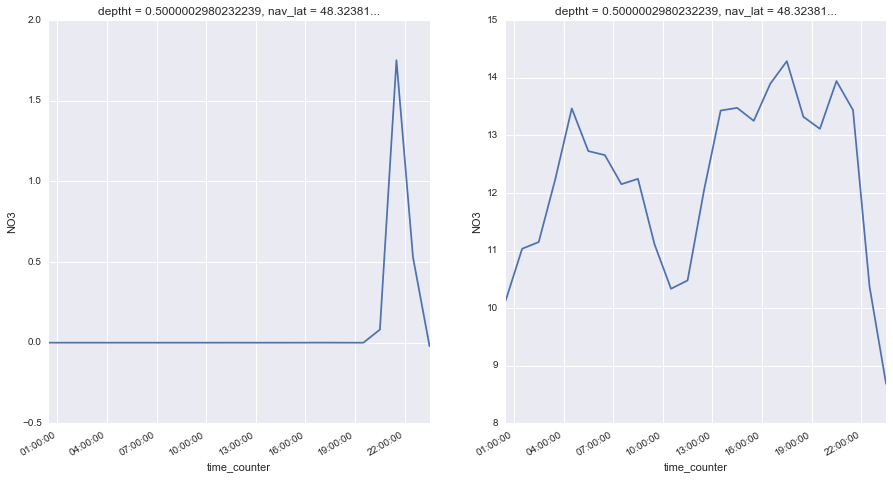

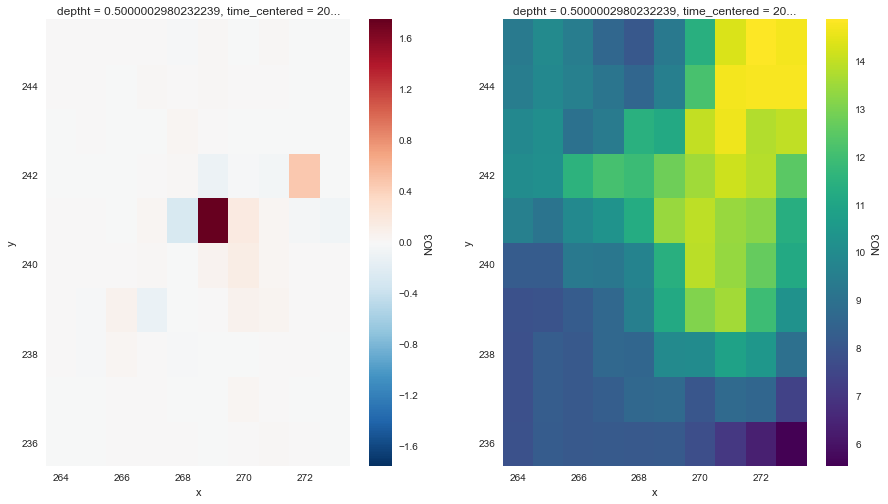

In [24]:
plot_time_dif("NO3", n_grid_t, r_grid_t)
plot_space_dif("NO3", n_grid_t, r_grid_t)

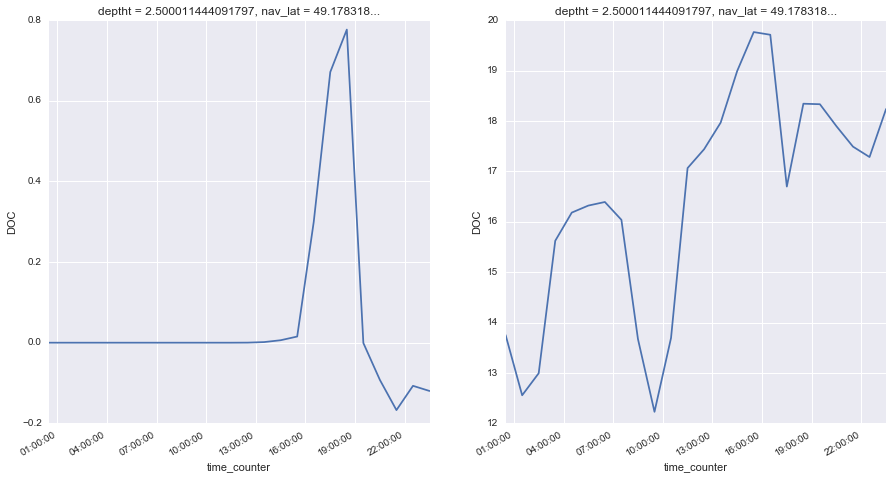

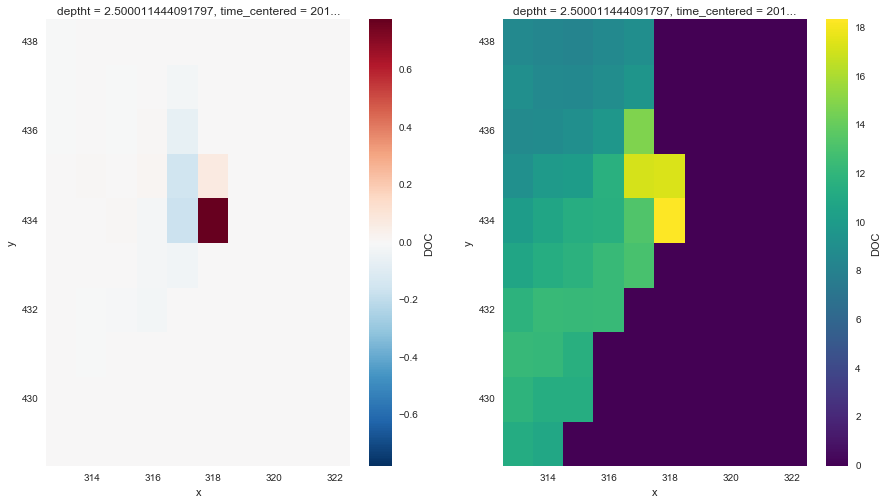

In [26]:
plot_time_dif("DOC", n_grid_t, r_grid_t)
plot_space_dif("DOC", n_grid_t, r_grid_t)

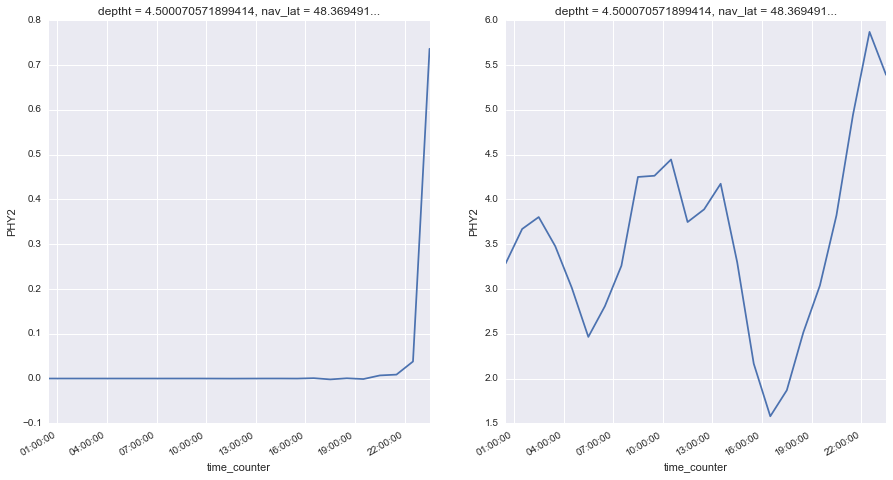

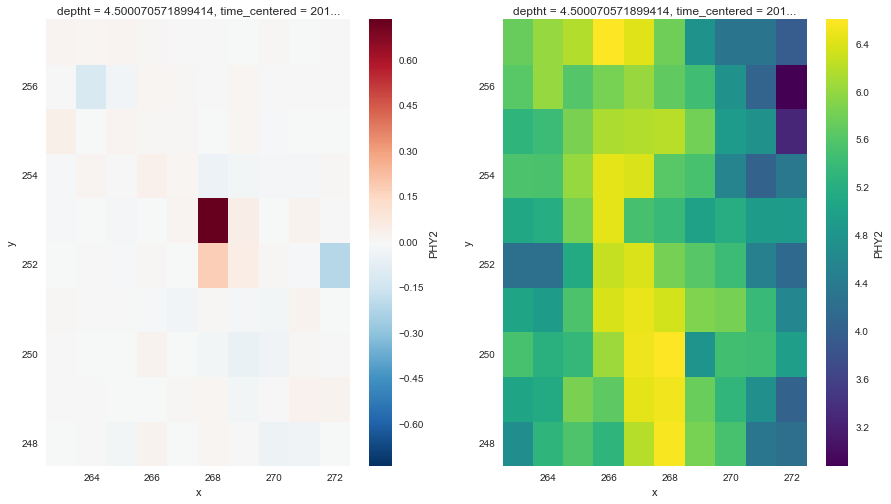

In [27]:
plot_time_dif("PHY2", n_grid_t, r_grid_t)
plot_space_dif("PHY2", n_grid_t, r_grid_t)

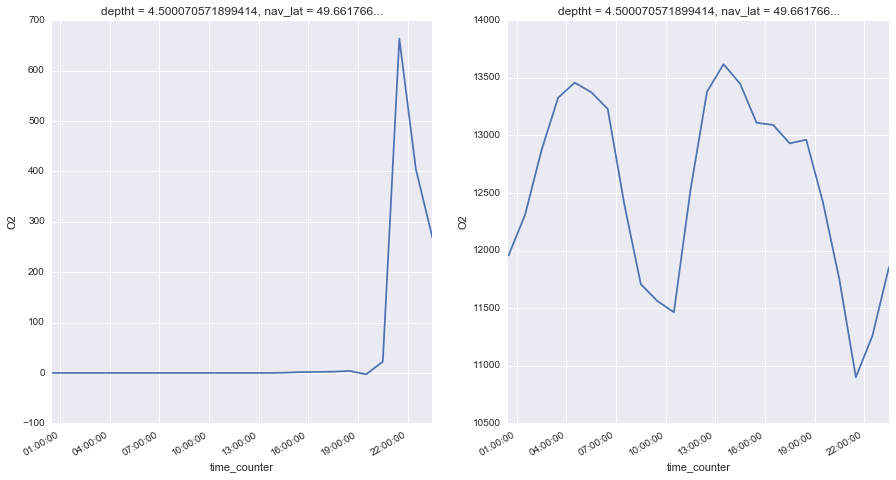

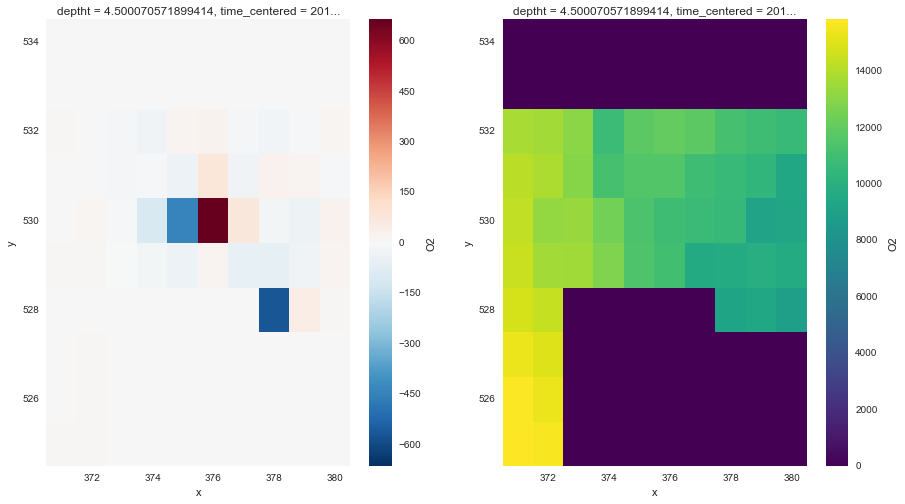

In [28]:
plot_time_dif("O2", n_grid_t, r_grid_t)
plot_space_dif("O2", n_grid_t, r_grid_t)

In [8]:
nowcast_v_path = "/results/SalishSea/nowcast-green/18apr16/SalishSea_1h_20160418_20160418_grid_V.nc"
rerun_v_path = "/data/jpetrie/MEOPAR/SalishSea/results/full_domain/apr18_full_run_round_2/SalishSea_1h_20160418_20160418_grid_V.nc"

n_grid_v = xr.open_dataset(nowcast_v_path)
r_grid_v = xr.open_dataset(rerun_v_path)

In [4]:
v_dif = (n_grid_v.vomecrty - r_grid_v.vomecrty)

In [5]:
v_dif.dot(v_dif)

<xarray.DataArray ()>
array(0.5902874930628588)

In [6]:
v_dif.sum()

<xarray.DataArray 'vomecrty' ()>
array(-44.34479104539276)

In [7]:
n_grid_v.sum()

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    *empty*
Data variables:
    area                  float64 7.744e+10
    bounds_lat            float64 6.962e+07
    bounds_lon            float64 -1.784e+08
    depthv_bounds         float64 8.435e+03
    time_centered_bounds  float64 1.762e+11
    time_counter_bounds   float64 1.762e+11
    vomecrty              float64 1.979e+05

In [11]:
n_grid_v

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 40, nvertex: 4, time_counter: 24, x: 398, y: 898)
Coordinates:
  * depthv                (depthv) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 46.8612 46.8632 46.8651 46.867 ...
    nav_lon               (y, x) float32 -123.431 -123.425 -123.42 -123.415 ...
    time_centered         (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * nvertex               (nvertex) int64 0 1 2 3
  * x                     (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * y                     (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    area                  (y, x) float32 185389.0 190975.0 194863.0 197725.0 ...
    bounds_lat            (y, x, nvertex) float32 46.8612 46.8612 46.8612 ...
    bounds_lon            (y, x, nv

In [18]:
n_grid_v

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthv: 40, nvertex: 4, time_counter: 24, x: 398, y: 898)
Coordinates:
  * depthv                (depthv) float32 0.5 1.5 2.50001 3.50003 4.50007 ...
    nav_lat               (y, x) float32 46.8612 46.8632 46.8651 46.867 ...
    nav_lon               (y, x) float32 -123.431 -123.425 -123.42 -123.415 ...
    time_centered         (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2016-04-18T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * nvertex               (nvertex) int64 0 1 2 3
  * x                     (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * y                     (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    area                  (y, x) float32 185389.0 190975.0 194863.0 197725.0 ...
    bounds_lat            (y, x, nvertex) float32 46.8612 46.8612 46.8612 ...
    bounds_lon            (y, x, nv

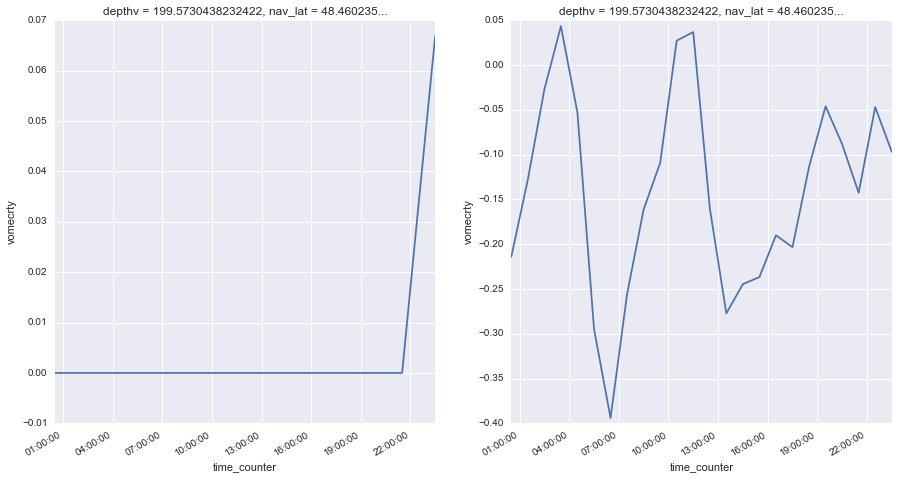

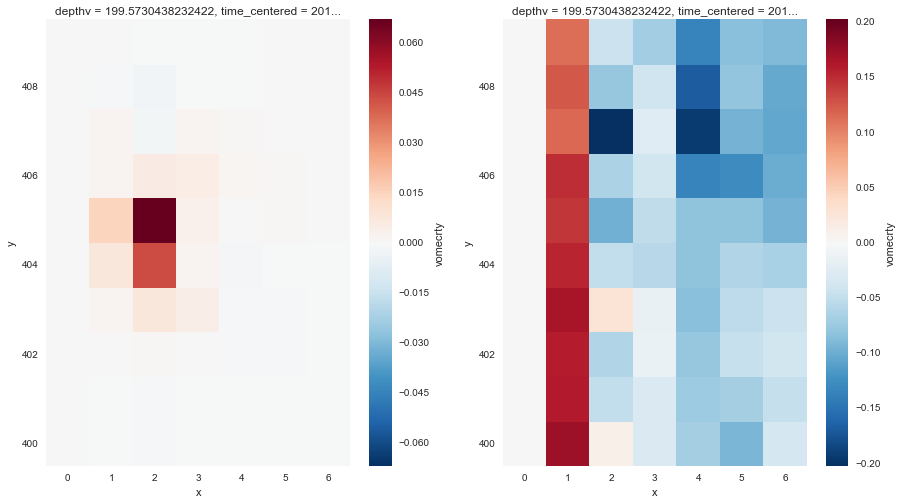

In [51]:
plot_time_dif("vomecrty", n_grid_v, r_grid_v)
plot_space_dif("vomecrty", n_grid_v, r_grid_v)